<a href="https://www.kaggle.com/code/patimejia/fastai-02-production-test-writing-0-00-1?scriptVersionId=118180779" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Install or Update Fastai and DuckDuckGo Versions

In [139]:
!python -m pip list | grep fast

fastai                                2.7.10
fastapi                               0.89.1
fastavro                              1.5.2
fastcore                              1.5.27
fastdownload                          0.0.7
fasteners                             0.17.3
fastjsonschema                        2.15.3
fastprogress                          1.0.3
fasttext                              0.9.2
pyfasttext                            0.4.6


check for duck duck go

In [140]:
!python -m pip list | grep 'du\|dd'

duckduckgo-search                     2.8.0
giddy                                 2.3.3
google-cloud-scheduler                2.6.4
mdurl                                 0.1.0
pyasn1-modules                        0.2.7
pydub                                 0.25.1
sklearn-contrib-py-earth              0.1.0+1.gdde5f89
tensorflow-addons                     0.14.0


Therefore, there is no installation of `duckduckgo` or any library with `du` or `dd` in its filename.

Install `duckduckgo_search` with `pip`:

In [141]:
!pip install -Uqq duckduckgo_search fastai


- `pip` is a recursive acronym that can stand for either "Pip Installs Packages" or "Pip Installs Python".
- `pip` is a command line tool for installing and managing Python packages, otherwise known as modules or libraries. Non-Python packages can also be installed using `pip` such as Java, C, C++, and Fortran libraries.
- `install` is a subcommand of `pip` that installs packages.
- `-U` is an option of `pip install` that upgrades the package to the latest version.
- `-qq` is an option of `pip install` that suppresses the output of the command.
- `duckduckgo_search` is the name of the package to install. It is a Python wrapper for the DuckDuckGo search engine and is available on PyPI. 
- `duckduckgo_search` is a dependency of `fastai` and is not installed by default.
- [documentation](https://pypi.org/project/duckduckgo-search/#3-ddg_images---image-search-by-duckduckgocom) for `duckduckgo_search`


In [142]:
!python -m pip list | grep 'du\|dd\|fast'

duckduckgo-search                     2.8.0
fastai                                2.7.10
fastapi                               0.89.1
fastavro                              1.5.2
fastcore                              1.5.27
fastdownload                          0.0.7
fasteners                             0.17.3
fastjsonschema                        2.15.3
fastprogress                          1.0.3
fasttext                              0.9.2
giddy                                 2.3.3
google-cloud-scheduler                2.6.4
mdurl                                 0.1.0
pyasn1-modules                        0.2.7
pydub                                 0.25.1
pyfasttext                            0.4.6
sklearn-contrib-py-earth              0.1.0+1.gdde5f89
tensorflow-addons                     0.14.0


shows `duckduckgo-search` verision 2.8.0 has been installed and `fastai` latest version

## Test: Installation and Import Process

In [143]:
def test_imports():
    try:
        import fastai
        import duckduckgo_search
    except ImportError as e:
        print(f'Import failed: {e}')
        return

    print(f'fastai version: {fastai.__version__}')
    print(f'duckduckgo_search version: {duckduckgo_search.__version__}')
    print('Success! All import calls were successful.')


test_imports()

fastai version: 2.7.10
duckduckgo_search version: 2.8.0
Success! All import calls were successful.


# Collecting Data
## Create the Image Search Function

In [144]:
from duckduckgo_search import ddg_images
from fastai.vision.all import *


def search_image_urls(term:str, max_images:int, min_sz:int)->List:
    print(f"Searching for {term} images with a minimum size of {min_sz}x{min_sz} pixels and a maximum of {max_images} images.")
    results = ddg_images(term, max_results=max_images)
    images = [result.get('image') for result in results if result.get('width')>min_sz and result.get('height')>min_sz]
    return L(images).unique().sorted()

The code imports the `ddg_images` function from the `duckduckgo_search"`library and the `L` function and everything else from the `fastai.vision.all` module.

A function `search_image_urls` is defined that takes in three arguments:

- `term`: a string representing the search term.
- `max_images`: the maximum number of images to be returned.
- `min_sz`: the minimum size of images to be returned.

The code prints a message indicating that it is searching for images using the search term.

The `ddg_images` function is called with the search term and the maximum number of images to be returned, and the result is stored in the `results` variable.

A list comprehension is used to filter the `results` to only include images that have a width and height greater than the `min_sz` value. The filtered images are stored in the `images` variable.

The code creates a fastai.core.List object using the `L` function and applies the `unique()` and `sorted()` methods to it to remove duplicate URLs and sort the list, respectively.

The result is returned as the output of the function.

In [145]:
term = 'Umbelliferae seeds'
min_sz=128
max_images=150 

url_list = search_image_urls(term, max_images, min_sz) 

Searching for Umbelliferae seeds images with a minimum size of 128x128 pixels and a maximum of 150 images.


## Test: Image Search Function

In [146]:
def test_search_image_urls(url_list, number_of_results_to_print): 
    try:
        url_list = search_image_urls(term, max_images, min_sz)
    except Exception as e:
        print(f'Test failed: {e}')
        return

    print(f'Number of images found: {len(url_list)}')
    print(f'Number of duplicates: {len(url_list)-len(url_list.unique())}')
    print(f'Number of images dropped due to size: {max_images-len(url_list)}')
    print(f'Number of images kept: {len(url_list)}')
    print(f'Number of images to print: {number_of_results_to_print}')
    print('Success! The search_image_urls function works as expected.')
    print(f'Here are some sample urls: {url_list[:number_of_results_to_print]}')

In [147]:
test_search_image_urls(url_list,3)

Searching for Umbelliferae seeds images with a minimum size of 128x128 pixels and a maximum of 150 images.
Number of images found: 149
Number of duplicates: 0
Number of images dropped due to size: 1
Number of images kept: 149
Number of images to print: 3
Success! The search_image_urls function works as expected.
Here are some sample urls: ['http://2.bp.blogspot.com/-E2ElRb0KWvg/UOZKbjOgvsI/AAAAAAAAACs/fr7Agrbpy-s/s1600/352-angelica_archangelica.jpg', 'http://castle.eiu.edu/prairie/images/periamer.fruits2.jpg', 'http://chileflora.com/Florachilena/ImagesHigh/NEIMG_2404.jpg']


## Test: Image Download and Save
Testing the process of downloading a single image from a URL, saving it to a path, and opening it

- Set image destination path `dest`
- Download first URL in `url_list` to `dest` with progress shown
- Open `dest` using `Image.open` method from the `PIL` library (Python Imaging Library).
- Resize to 256x256 with `resize` method
- Overwrite original with resized image and save to `dest`
- Display the resized image, `im`

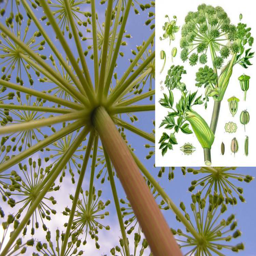

In [148]:
dest = 'tests/test_image.jpg'
download_url(url_list[0], dest, show_progress=true)

im = Image.open(dest)
im = im.resize((256, 256))
im.save(dest)
im

- Define a Path object called `path` for the directory `tests`
- Get all image files within `tests` directory using `get_image_files`
- Store file paths in `fns`, a list of filenames
- Display the list of filenames, `fns`, in the `tests` folder

In [149]:
path = Path('tests')
fns = get_image_files(path)
fns

(#1) [Path('tests/test_image.jpg')]

## Delete the test folder and everything inside it (optional):

In [150]:
# # Remove test folder and its content
# !rm -rf tests

In [151]:
# # Delete all files in the current directory.
# !pwd
# !rm -rf *

# Fetch Images with Fastai's download_images
Using fastai's download_images to fetch all the URLs for each search term and store them in individual folders

In [152]:
seed_types = 'parsley', 'dill', 'coriander'
path = Path('seeds')

In [153]:
if not path.exists():
    path.mkdir()
for seed_type in seed_types:
    dest = (path/seed_type)
    dest.mkdir(exist_ok=True)
    results = search_image_urls(seed_type, 150, 128)
    download_images(dest, urls=results)


Searching for parsley images with a minimum size of 128x128 pixels and a maximum of 150 images.
Searching for dill images with a minimum size of 128x128 pixels and a maximum of 150 images.
Searching for coriander images with a minimum size of 128x128 pixels and a maximum of 150 images.


## testing 

In [154]:
fns = get_image_files(path)
fns


(#407) [Path('seeds/parsley/429694c7-5525-4021-9789-e2a6cc143423.gif'),Path('seeds/parsley/27b97180-ff42-498b-b0ec-788bddb40991.jpg'),Path('seeds/parsley/319d898e-27a7-4177-8e66-0d0fdd4b8c1e.jpg'),Path('seeds/parsley/1c551f75-5fb0-4d24-b146-a939f347a045.jpg'),Path('seeds/parsley/38197fc1-7c1b-42ad-9373-6fbe48e06ef9.jpg'),Path('seeds/parsley/8f8baa50-ced8-4828-9909-9d828f87ff3d.jpg'),Path('seeds/parsley/279fc9db-c827-4dc7-a6ac-f55dc9197f78.jpg'),Path('seeds/parsley/7d0d785a-8ff2-4113-b1a0-2e991f5b9b95.jpg'),Path('seeds/parsley/a80f32d3-3623-4ebf-91fa-dab67adf3467.jpg'),Path('seeds/parsley/808e87ae-d193-4476-997a-6132c2d7c045.jpg')...]

In [155]:
len(fns)

407

In [156]:
for seed_type in seed_types:
    print(f'Number of {seed_type} images: {len(get_image_files(path/seed_type))}')
print(f'Total number of images: {sum([len(get_image_files(path/seed_type)) for seed_type in seed_types])}')


Number of parsley images: 139
Number of dill images: 135
Number of coriander images: 133
Total number of images: 407


In [157]:
failed = verify_images(fns)
print(f'Number of images deleted: {len(failed)}')
failed


Number of images deleted: 7


(#7) [Path('seeds/parsley/89880f4b-9ab0-4f10-a4b7-4896b1861ce7.jpg'),Path('seeds/parsley/184d4b95-37ee-4879-bd8d-b904bd9fef3e.jpeg'),Path('seeds/parsley/4c084446-8785-4938-a6fb-c42f94c56839.jpg'),Path('seeds/dill/cdc09889-3da3-4da9-8239-be3f47514c43.jpg'),Path('seeds/coriander/5866b6f1-8462-41e9-8140-e8ac6b3cd72f.jpg'),Path('seeds/coriander/2688933e-f6cd-498b-a5d3-b578f28019b2.jpg'),Path('seeds/coriander/1a1e251e-4ae9-4e07-8be5-da3eebe78e50.jpg')]

In [158]:
failed.map(Path.unlink);

In [159]:
for seed_type in seed_types:
    print(f'Number of {seed_type} images: {len(get_image_files(path/seed_type))}')

print(f'Start number of images found: {len(fns)}')
print(f'End number of images: {sum([len(get_image_files(path/seed_type)) for seed_type in seed_types])}')
print(f'Number of images deleted: {len(failed)}')

Number of parsley images: 136
Number of dill images: 134
Number of coriander images: 130
Start number of images found: 407
End number of images: 400
Number of images deleted: 7


In [ ]:
# Data Loaders